In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tables

In [136]:
customers = pd.read_csv('../DataSet/cleaned_dataset/customers_cleaned.csv')
geolocation = pd.read_csv('../DataSet/cleaned_dataset/geolocation_cleaned.csv')
order_items = pd.read_csv('../DataSet/cleaned_dataset/order_items_cleaned.csv')
order_payments = pd.read_csv('../DataSet/cleaned_dataset/payments_cleaned.csv')
order_reviews = pd.read_csv('../DataSet/cleaned_dataset/reviews_cleaned.csv')
orders = pd.read_csv('../DataSet/cleaned_dataset/orders_cleaned.csv')
products = pd.read_csv('../DataSet/cleaned_dataset/products_cleaned.csv')
sellers = pd.read_csv('../DataSet/cleaned_dataset/sellers_cleaned.csv')
product_category = pd.read_csv('../DataSet/cleaned_dataset/product_category_name_cleaned.csv')

# order trends

# Total no of  orders placed

In [137]:

orders['order_id'].nunique()

99441

In [138]:
orders[['order_purchase_timestamp',
        'order_approved_at',
        'order_delivered_carrier_date',
        'order_delivered_customer_date',
        'order_estimated_delivery_date']] = orders[[
            'order_purchase_timestamp',
            'order_approved_at',
            'order_delivered_carrier_date',
            'order_delivered_customer_date',
            'order_estimated_delivery_date'
        ]].apply(pd.to_datetime)

In [139]:
orders['year'] = orders['order_purchase_timestamp'].dt.year
orders['month']=orders['order_purchase_timestamp'].dt.month_name()
orders['day']= orders['order_purchase_timestamp'].dt.day_name()


# order count by month and year

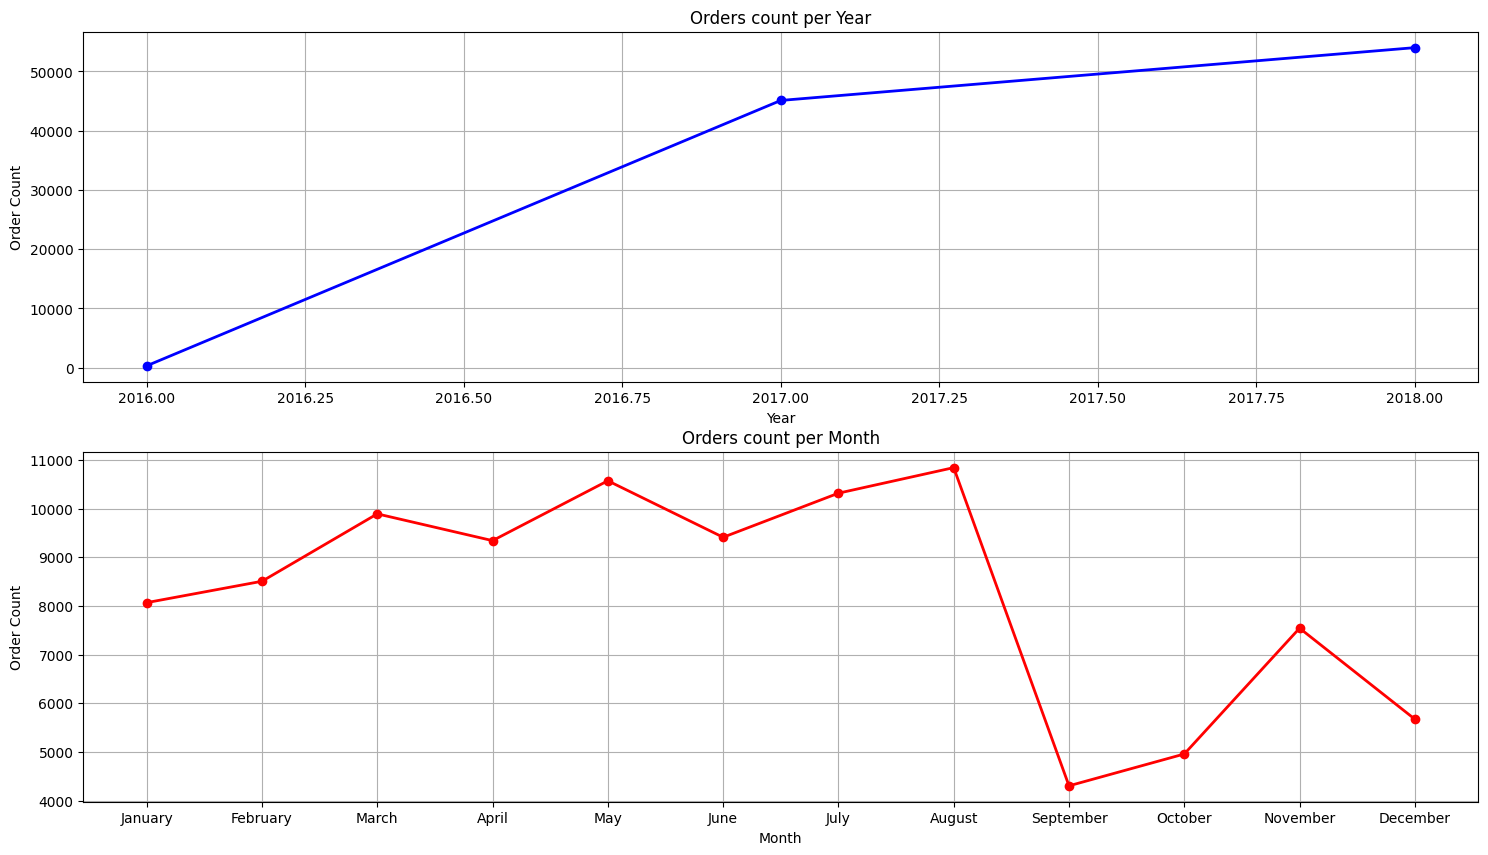

In [140]:
orders_per_year  = orders.groupby('year')['order_id'].count().reset_index()

orders_per_month = orders.groupby('month')['order_id'].count().reset_index()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

orders_per_month['month'] = pd.Categorical(
    orders_per_month['month'],
    categories=month_order,
    ordered=True
)
orders_per_month = orders_per_month.sort_values('month')


fig, axes = plt.subplots(2,1, figsize=(18,10))
axes[0].plot(orders_per_year['year'], orders_per_year['order_id'], marker='o', color='blue', linewidth=2)
axes[0].set_title('Orders count per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Order Count')
axes[0].grid(True)

axes[1].plot(orders_per_month['month'], orders_per_month['order_id'], marker='o', color='red', linewidth=2)
axes[1].set_title('Orders count per Month')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Order Count')
axes[1].grid(True)


# order count by day and day type

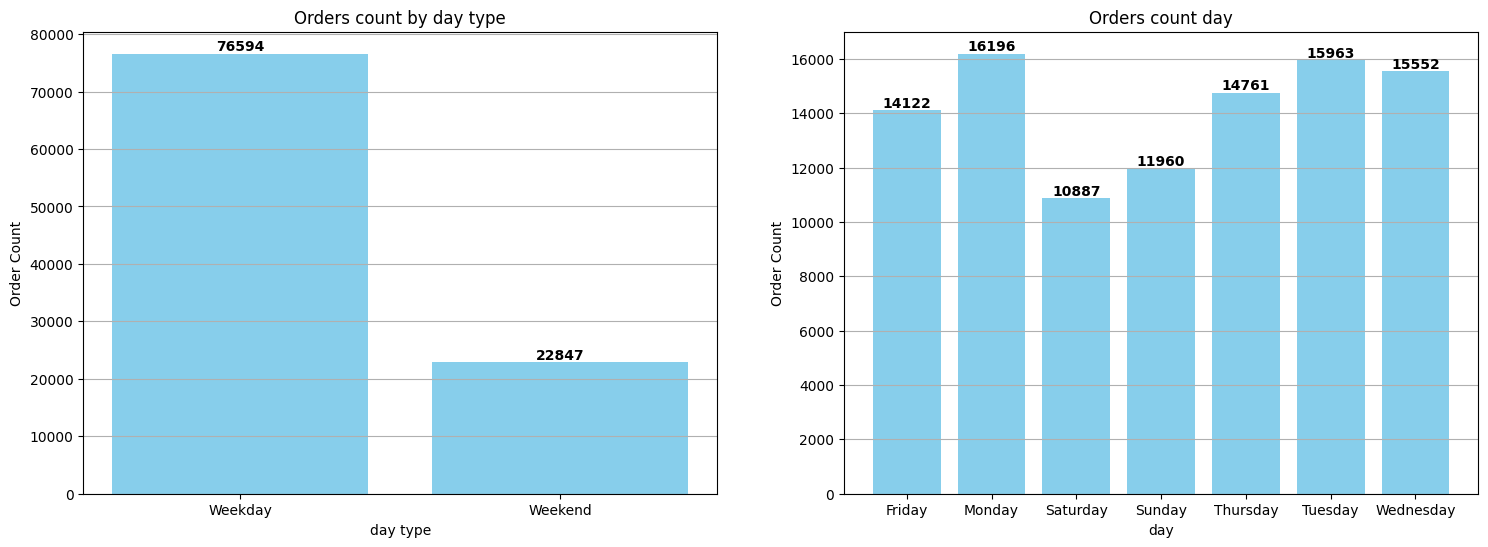

In [141]:
# Define mapping
weekday_map = {
    'Monday'   : 'Weekday',
    'Tuesday'  : 'Weekday',
    'Wednesday': 'Weekday',
    'Thursday' : 'Weekday',
    'Friday'   : 'Weekday',
    'Saturday' : 'Weekend',
    'Sunday'   : 'Weekend'
}

# Apply mapping
orders['day_type'] = orders['day'].map(weekday_map)
orders_per_day_type   = orders.groupby('day_type')['order_id'].count().reset_index()
orders_per_day   = orders.groupby('day')['order_id'].count().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(18,6))
bars =axes[0].bar(orders_per_day_type['day_type'], orders_per_day_type['order_id'],color='skyblue')
for bar in bars:
    height = bar.get_height()
    axes[0].text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position
        f'{int(height)}',                   # Label text
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

axes[0].set_title('Orders count by day type')
axes[0].set_xlabel('day type')
axes[0].set_ylabel('Order Count')
axes[0].grid(axis='y')

bars =axes[1].bar(orders_per_day['day'], orders_per_day['order_id'],color='skyblue')
for bar in bars:
    height = bar.get_height()
    axes[1].text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,                             # Y position
        f'{int(height)}',                   # Label text
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )
axes[1].set_title('Orders count day')
axes[1].set_xlabel('day')
axes[1].set_ylabel('Order Count')
axes[1].grid(axis='y')


# Top 5 cities and states by order count

In [142]:
mdf= pd.merge(left=customers,right=orders,on='customer_id')

In [143]:
customers.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

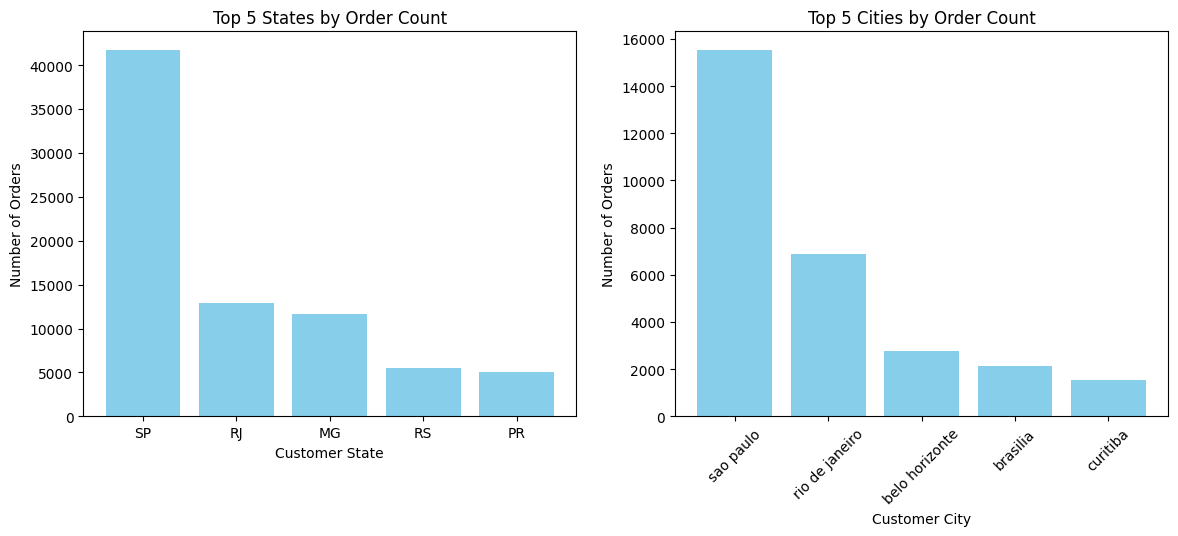

In [144]:
top5_states=mdf.groupby('customer_state')['order_id'].count().sort_values(ascending=False).iloc[:5]
top10_cities = mdf.groupby('customer_city')['order_id'].count().sort_values(ascending=False).iloc[:5]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
axes[0].bar(top5_states.index, top5_states.values, color='skyblue')
axes[0].set_title('Top 5 States by Order Count')
axes[0].set_xlabel('Customer State')
axes[0].set_ylabel('Number of Orders')

axes[1].bar(top10_cities.index, top10_cities.values, color='skyblue')
axes[1].set_title('Top 5 Cities by Order Count')
axes[1].set_xlabel('Customer City')
axes[1].set_ylabel('Number of Orders')
axes[1].tick_params(axis='x', rotation=45)


# One time buyers Vs Repeated customers

In [145]:
mdf.groupby('customer_unique_id')['order_id'].count().sort_values(ascending=False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
1b6c7548a2a1f9037c1fd3ddfed95f33     7
                                    ..
5657dfebff5868c4dc7e8355fea865c4     1
5657596addb4d7b07b32cd330614bdf8     1
5656eb169546146caeab56c3ffc3d268     1
5656a8fabc8629ff96b2bc14f8c09a27     1
ffffd2657e2aad2907e67c3e9daecbeb     1
Name: order_id, Length: 96096, dtype: int64

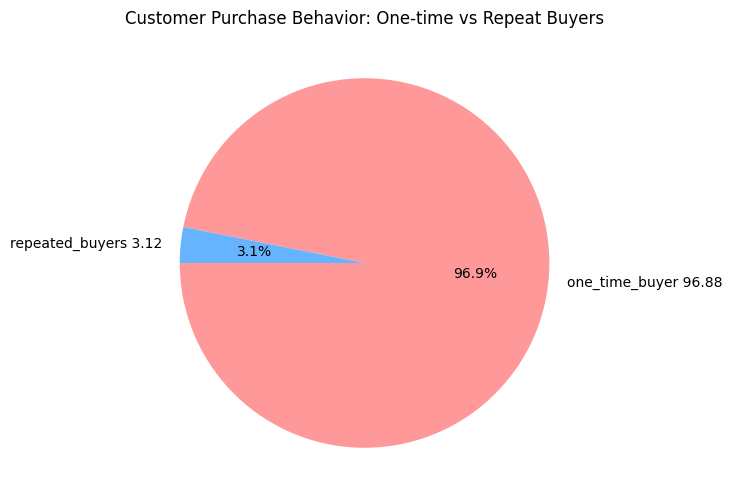

In [146]:
customers_orders= mdf.groupby('customer_unique_id')['order_id'].count()

one_time_buyer= (customers_orders==1).sum()
repeated_buyers = (customers_orders>1).sum()
total_cust= one_time_buyer+repeated_buyers

one_time_pct= round((one_time_buyer/total_cust)*100, 2)
repeated_pct= round((repeated_buyers/total_cust)*100, 2)

labels =[f'one_time_buyer {one_time_pct}', f'repeated_buyers {repeated_pct}']
sizes= [one_time_buyer, repeated_buyers]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', 
    startangle=180,colors = ['#ff9999','#66b3ff'])
plt.title('Customer Purchase Behavior: One-time vs Repeat Buyers')
plt.show()

In [147]:
pmdf=products.merge(product_category, on='product_category_name', how = 'inner')

# Total no unique Categories

In [148]:
pmdf['product_category_name'].nunique()

71

# Total no of products

In [149]:
pmdf['product_category_name_english'].count()

np.int64(32328)

# Unique Categories and thier product count

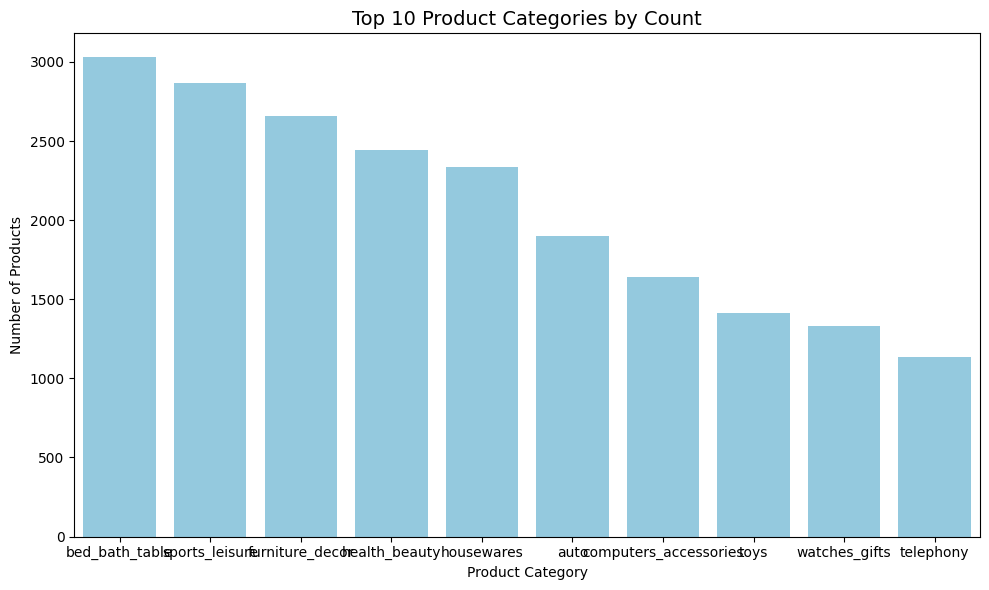

In [150]:

category_count=pmdf.groupby('product_category_name_english')['product_id'].count().sort_values(ascending=False).reset_index().rename(columns={'product_id':'count'})
top10_category=category_count.head(10).copy()
top10_category

plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_category,
    x='product_category_name_english',
    y='count', color='skyblue'
)

plt.title('Top 10 Product Categories by Count', fontsize=14)
plt.ylabel('Number of Products')
plt.xlabel('Product Category')
plt.tight_layout()
plt.show()

## Unqiue Customers per Year

In [151]:
customer_by_year= orders.groupby('year')['customer_id'].nunique().reset_index()
customer_by_year.rename(columns={'customer_id':'Unique_customers'}, inplace=True)
customer_by_year

,year,Unique_customers
0,2016,329
1,2017,45101
2,2018,54011


In [152]:
orders_merged=orders.merge(order_items, on = 'order_id', how='inner')
sellers_by_year=orders_merged.groupby('year')['seller_id'].nunique().reset_index()
sellers_by_year.rename(columns={'seller_id':'Unique_sellers'}, inplace=True)
sellers_by_year

,year,Unique_sellers
0,2016,145
1,2017,1784
2,2018,2383


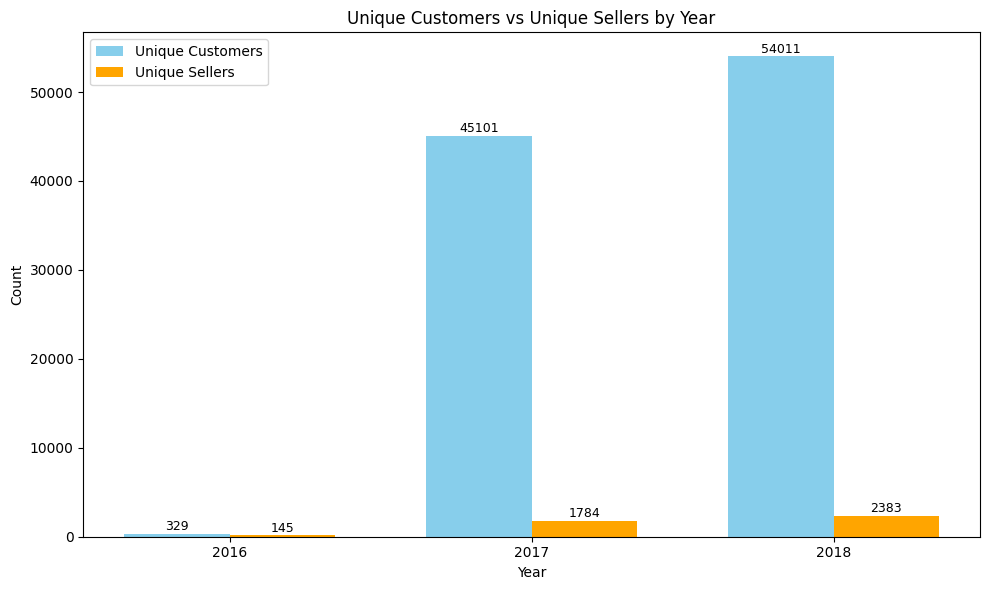

In [153]:
yearly_summary = customer_by_year.merge(sellers_by_year, on='year')

plt.figure(figsize=(10,6))
bar_width = 0.35
x = range(len(yearly_summary['year']))

# Bars
bars1 = plt.bar(x, yearly_summary['Unique_customers'], width=bar_width, label='Unique Customers', color='skyblue')
bars2 = plt.bar([p + bar_width for p in x], yearly_summary['Unique_sellers'], width=bar_width, label='Unique Sellers', color='orange')

# Add labels on top of bars
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Formatting
plt.xticks([p + bar_width/2 for p in x], yearly_summary['year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Unique Customers vs Unique Sellers by Year')
plt.legend()
plt.tight_layout()
plt.show()


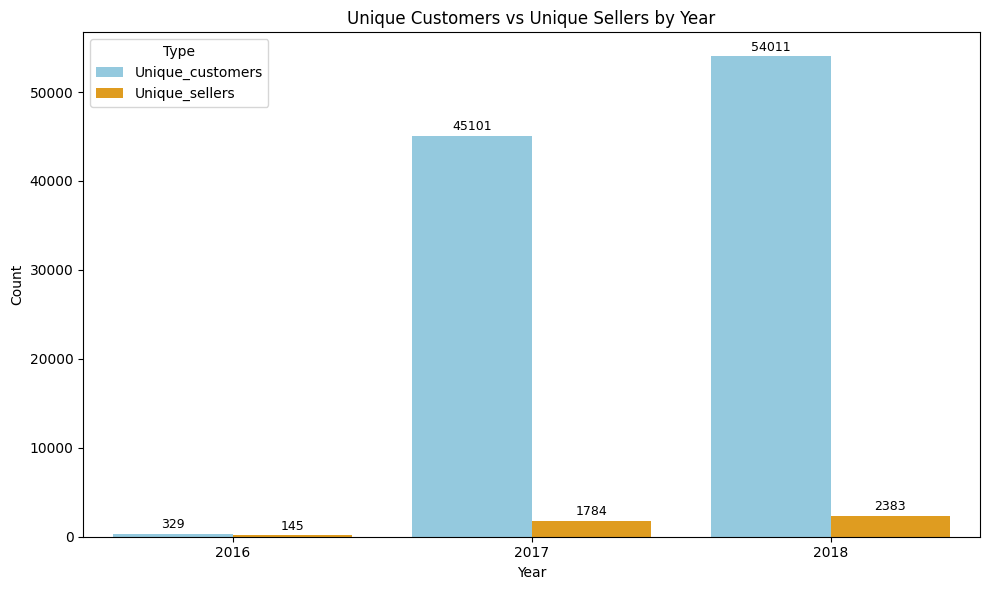

In [154]:
yearly_summary = customer_by_year.merge(sellers_by_year, on='year')

yearly_melted = yearly_summary.melt(id_vars='year',
                                    value_vars=['Unique_customers', 'Unique_sellers'],
                                    var_name='Type', value_name='Count')

plt.figure(figsize=(10,6))
ax = sns.barplot(data=yearly_melted, x='year', y='Count', hue='Type', palette=['skyblue','orange'])

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=9, padding=2)

plt.title('Unique Customers vs Unique Sellers by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Peak Purchase Hours

In [155]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99441 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   year                           99441 non-null  int32         
 9   month                          99441 non-null  object        
 10  day                            99441 non-null  object        
 11  day_type       

In [156]:
orders['hours']=orders['order_purchase_timestamp'].dt.hour

In [157]:
peak_hours=orders.groupby('hours')['order_id'].count().reset_index()
peak_hours.rename(columns={'order_id': 'orders_placed'},inplace=True)

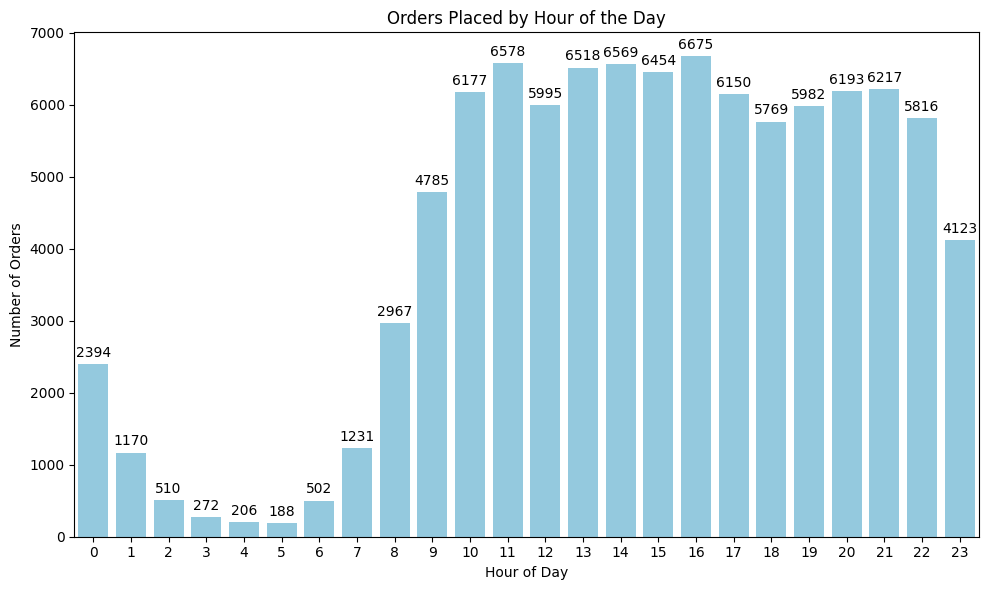

In [158]:

plt.figure(figsize=(10,6))
ax=sns.barplot(data=peak_hours, x='hours', y='orders_placed', color='skyblue')
ax.bar_label(ax.containers[0], fmt='%d', padding=3)

plt.title('Orders Placed by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()


## Cities with more than 500 customers

In [159]:
citys_500=customers.groupby('customer_city')['customer_unique_id'].count().sort_values(ascending=False).reset_index()
citys_500.rename(columns={'customer_unique_id':'customers'}, inplace= True)
citys_500 = citys_500[citys_500['customers']>=500]
citys_500

,customer_city,customers
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


C:\Users\Tarun Y\AppData\Local\Temp\ipykernel_6224\265519697.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


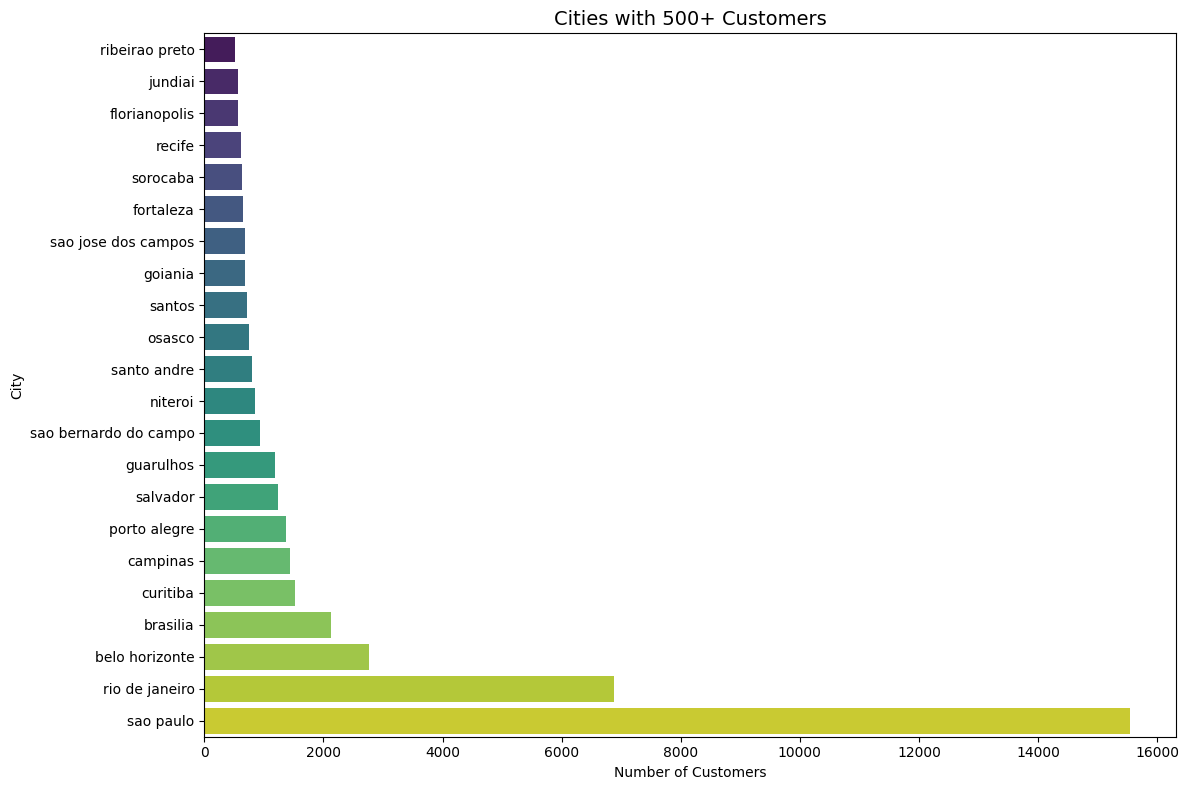

In [160]:
plt.figure(figsize=(12, 8))
sns.barplot(
    data=citys_500.sort_values('customers', ascending=True),
    y='customer_city',
    x='customers',
    palette='viridis'
)

plt.title('Cities with 500+ Customers', fontsize=14)
plt.xlabel('Number of Customers')
plt.ylabel('City')
plt.tight_layout()
plt.show()


## Revenue and Product Sold by Weekly

In [166]:
orders['week_num']=orders['order_purchase_timestamp'].dt.isocalendar().week
mdf=pd.merge(left=orders,right=order_items,on='order_id',how='inner')
revenue_by_week_num=mdf.groupby(by=['week_num']).agg({'product_id':['count'],'price':['sum']}).reset_index()
revenue_by_week_num.columns=['week_num','ordercount','revenue']

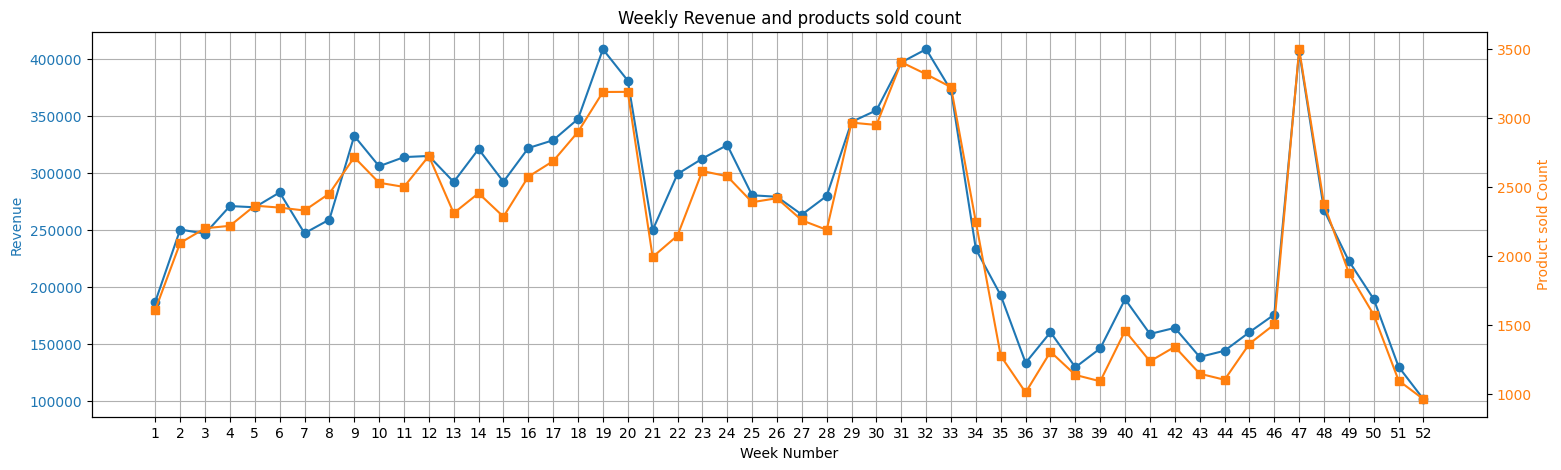

In [167]:
fig, ax1 = plt.subplots(figsize=(18,5))
ax1.plot(revenue_by_week_num['week_num'], revenue_by_week_num['revenue'], color='tab:blue', marker='o', label='Revenue')
ax1.set_xlabel('Week Number')
ax1.set_ylabel('Revenue', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.plot(revenue_by_week_num['week_num'], revenue_by_week_num['ordercount'], color='tab:orange', marker='s', label='Order Count')
ax2.set_ylabel('Product sold Count', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')
ax1.set_xticks(range(revenue_by_week_num['week_num'].min(), revenue_by_week_num['week_num'].max() + 1, 1))

plt.title('Weekly Revenue and products sold count')
ax1.grid(True)

plt.show()

## Top3 Products by Month and Year

In [181]:
mdf['month_num']= mdf['order_purchase_timestamp'].dt.month
top3_products=mdf.groupby(by=['year','month_num','product_id']).agg({'product_id':['count'],'price':['sum']}).reset_index()
top3_products.columns=['year','month_num','product_id','count','revenue']
top3_products['rank'] = (
    top3_products.groupby(['year', 'month_num'])['count']
                 .rank(method='dense', ascending=False)
)
top3_products[top3_products['rank']<=3]
top3 = top3_products[top3_products['rank'] <= 3].copy()

In [184]:
pivot_top3 = (
    top3
    .pivot(index=['month', 'rank'], columns='year', values='product_id')
    .reset_index()
)

# Remove the extra name for the column index
pivot_top3.columns.name = None

# Rename columns for clarity
pivot_top3.rename(
    columns={
        1.0: 'Top_1_Product',
        2.0: 'Top_2_Product',
        3.0: 'Top_3_Product'
    },
    inplace=True
)

# If you have month_num for sorting months properly
pivot_top3 = pivot_top3.sort_values(['month', 'rank']).reset_index(drop=True)

pivot_top3


KeyError: 'month'